In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
csvpath ="C:\\NewPythonVS\\DSSS\\dsss_hw_5\\winequality-red.csv"
winee = pd.read_csv(csvpath)

In [6]:
wqr_df = winee.drop('quality', axis=1)
qual = winee['quality']
# qual_drop

In [7]:
from sklearn.decomposition import PCA

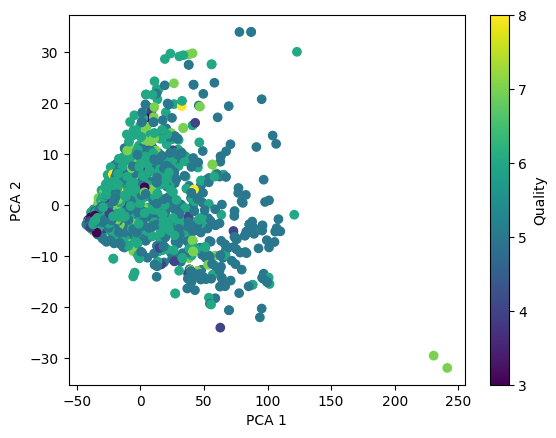

In [8]:
pca = PCA(n_components=2)
wqr_df_pca = pca.fit_transform(wqr_df)
scatter = plt.scatter(wqr_df_pca[:,0], wqr_df_pca[:,1], c=qual)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Quality')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# normalize data but only the numerical columns
wqr_df_stand = wqr_df.copy()
wqr_df_stand = scaler.fit_transform(wqr_df)
wqr_df_stand = pd.DataFrame(wqr_df_stand)
wqr_df_stand.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


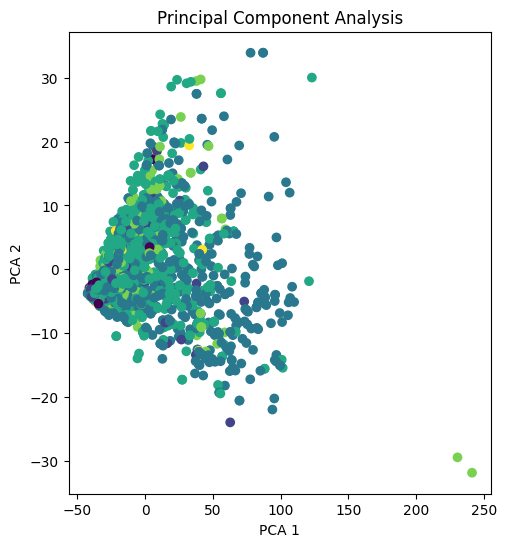

In [19]:
pca = PCA(n_components=2)
wqr_df_stand_pca = pca.fit_transform(wqr_df)
wqr_df_stand_pca = pca.fit_transform(wqr_df_stand)
# plot both
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(wqr_df_pca[:,0], wqr_df_pca[:,1], c=qual)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
# plt.title('Without standardization')
# # plt.subplot(122)
# plt.scatter(wqr_df_stand_pca[:,0], 
#             wqr_df_stand_pca[:,1], c=qual)
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# # plt.title('With standardization')
plt.title('Principal Component Analysis')
# plt.colorbar(label='Quality')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

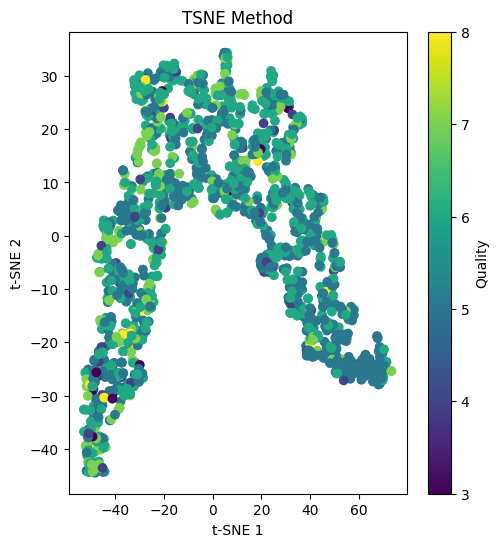

In [11]:
from sklearn.manifold import TSNE

# Create an instance of the TSNE class
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to the data
X_tsne = tsne.fit_transform(wqr_df)
X_tsne_standardized = tsne.fit_transform(wqr_df_stand)

# plot both
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=qual)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
# plt.title('Without standardization')
plt.title('TSNE Method')
plt.colorbar(label='Quality')
plt.show

# plt.subplot(1,2,2)
# plt.scatter(X_tsne_standardized[:,0], 
#             X_tsne_standardized[:,1], c=qual)
# plt.xlabel('t-SNE 1')
# plt.ylabel('t-SNE 2')
# plt.title('With standardization')
# plt.show()


c:\NewPythonVS\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\NewPythonVS\.venv\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


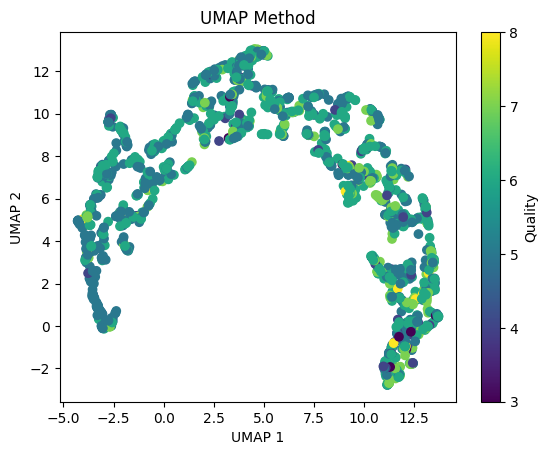

In [12]:
# apply UMAP to the data
import umap
X_umap = umap.UMAP(n_components=2, random_state=42)
X_umap = X_umap.fit_transform(wqr_df)

# plot the data
# plt.figure(figsize=(8,8))
scat = plt.scatter(X_umap[:,0], X_umap[:,1], c=qual)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(scat, label='Quality')
plt.title('UMAP Method')
plt.show()

STATISTICS

In [13]:
from scipy.stats import f_oneway

#Null Hypothesis (H0): There is no significant difference in the mean 'free sulfur dioxide' values among the wine quality groups (5, 6, and 7).

#Alternative Hypothesis (H1): There is a significant difference in the mean 'free sulfur dioxide' values between at least two of the wine quality groups.

f_statistic, p_value = f_oneway(winee[winee['quality'] == 3]['free sulfur dioxide'], 
                                 winee[winee['quality'] == 4]['free sulfur dioxide'],
                                 winee[winee['quality'] == 5]['free sulfur dioxide'],
                                 winee[winee['quality'] == 6]['free sulfur dioxide'],
                                 winee[winee['quality'] == 7]['free sulfur dioxide'],
                                 winee[winee['quality'] == 8]['free sulfur dioxide'],)

print('F-statistic: {}'.format(f_statistic))
print('p-value: {}'.format(p_value))

if p_value < 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')


F-statistic: 4.754233103987794
p-value: 0.00025708272340177853
We reject the null hypothesis


In [11]:
from scipy.stats import kruskal

# Null Hypothesis (H0): There is no significant difference in the 'free sulfur dioxide' values among the wine quality groups.
# Alternative Hypothesis (H1): There is a significant difference in the 'free sulfur dioxide' values between at least two of the wine quality groups.

# Extract data for each quality group
group_3 = winee[winee['quality'] == 3]['free sulfur dioxide']
group_4 = winee[winee['quality'] == 4]['free sulfur dioxide']
group_5 = winee[winee['quality'] == 5]['free sulfur dioxide']
group_6 = winee[winee['quality'] == 6]['free sulfur dioxide']
group_7 = winee[winee['quality'] == 7]['free sulfur dioxide']
group_8 = winee[winee['quality'] == 8]['free sulfur dioxide']

# Perform Kruskal-Wallis test
h_statistic, p_value_kruskal = kruskal(group_3, group_4, group_5, group_6, group_7, group_8)

print('H-statistic: {}'.format(h_statistic))
print('p-value (Kruskal-Wallis): {}'.format(p_value_kruskal))

if p_value_kruskal < 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')


H-statistic: 31.12837702820869
p-value (Kruskal-Wallis): 8.83609073000697e-06
We reject the null hypothesis


In [16]:
#Say the hypothesis is either the wine is good or the wine is bad depending on a metric
#Assuming that ['quality] = 3 is bad and ['quality] = 8 is good

# H0: There is no difference in the fixed acidity content between the good and bad quality wine
# H1: There is a difference in the fixed acidity content between the good and bad quality wine

#performing a t-test
# --> we use the t-test for independent samples because we have two independent groups (wine which may be good o)


In [14]:
# # plot histograms
# plt.hist(wqr_df['fixed acidity'])
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

# winee[winee['quality'] == 3]['fixed acidity'].hist(alpha=0.25, bins=20)
# winee[winee['quality'] == 8]['fixed acidity'].hist(alpha=0.5, bins=20)
# plt.xlabel('Alcohol')
# plt.ylabel('Frequency')
# plt.legend(['No disease', 'Disease'])
# plt.show()

In [15]:
# winee.boxplot(column='fixed acidity', by='quality')
# plt.show()
# import statsmodels.api as sm

# # create dummy variables
# test = np.random.normal(0, 1, 1000)

# sm.qqplot(test, line='45')
# plt.show()

In [22]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(winee[winee['quality'] == 3]['fixed acidity'], 
                                 winee[winee['quality'] == 8]['fixed acidity'])

print('t-statistic: {}'.format(t_statistic))
print('p-value: {}'.format(p_value))

# check if significant
if p_value < 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

t-statistic: -0.261240315524843
p-value: 0.7959654556020868
We fail to reject the null hypothesis
